Adan Gerardo Rodriguez Esparza 1846081
Cesar Alonso Sosa Garcia 1992096
Mariana Alejandra Sepulveda Saucedo 1908054
Ricardo Martin Alvarado Martinez 1991819
Rodrigo Betancourt Martinez 1911958

In [ ]:
#librerias
import cv2
import random
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator



253
253


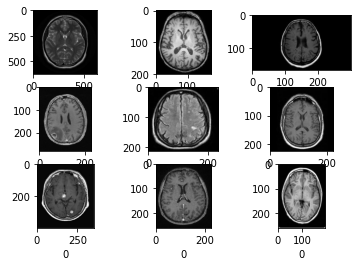

In [ ]:
#Cargar las imagenes en array separados
array_Notumor=[]
array_tumor=[]
for filepath in os.listdir('/content/drive/MyDrive/archive/brain_tumor_dataset/no'):
    array_Notumor.append(cv2.imread('/content/drive/MyDrive/archive/brain_tumor_dataset/no/{0}'.format(filepath),0))
for filepath in os.listdir('/content/drive/MyDrive/archive/brain_tumor_dataset/yes'):
    array_tumor.append(cv2.imread('/content/drive/MyDrive/archive/brain_tumor_dataset/yes/{0}'.format(filepath),0))
#Por cada imagen agregar el valor del label
ar_label0=[0 for file in array_Notumor]
ar_label1=[1 for file in array_tumor]
#suma ambos arrays tanto del dataset como de las etiquetas
array_all=array_Notumor+array_tumor
array_labels=ar_label0+ar_label1
print(len(array_all))
print(len(array_labels))
#verificar de manera visual que la operacion fue realizada correctamente
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(array_all[i], cmap=plt.get_cmap('gray'))
	plt.xlabel(array_labels[i])
plt.show()

Text(0.5, 0, '0')

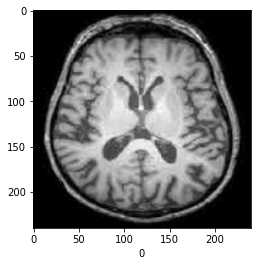

In [ ]:
#preprocesado de imagenes
#cambiar el tamaño para que todas las imagenes midan lo mismo 
array_resized=[cv2.resize(file,(240,240),interpolation=cv2.INTER_LINEAR)for file in array_all]
#normalizar los valores de las imagenes
for i in range(len(array_resized)):
  array_resized[i]=array_resized[i]/255
#visualizacion del preprocesado con imagen de label0
plt.imshow(array_resized[1],cmap=plt.get_cmap('gray'))
plt.xlabel(array_labels[1])


Text(0.5, 0, '1')

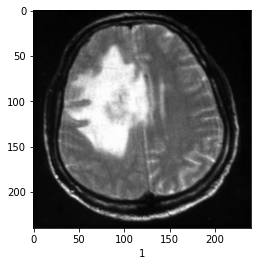

In [ ]:
#visualizacion del preprocesado con imagen de label1
plt.imshow(array_resized[100],cmap=plt.get_cmap('gray'))
plt.xlabel(array_labels[100])

tamaño imgs_training: 151
tamaño lbls_training: 151
tamaño imgs_test: 51
tamaño lbls_test: 51
tamaño imgs_val: 51
tamaño lbls_val: 51


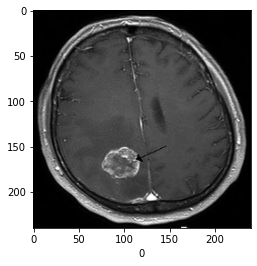

In [ ]:
#creacion de sets de training y validation usando numpy y scikitlearn
imgs=np.array(array_resized)
lbls=np.array(array_labels)
#Separamos en 80%, 20% con train_test_split de sklearn
imgs_training, imgs_test, lbls_training, lbls_test = train_test_split(imgs, lbls, test_size=0.20, random_state=32)
#Y hacemos lo mismo para el training y validation test
imgs_training, imgs_val, lbls_training, lbls_val = train_test_split(imgs_training, lbls_training, test_size=0.25, random_state=32)
print("tamaño imgs_training:",len(imgs_training))
print("tamaño lbls_training:",len(lbls_training))
print("tamaño imgs_test:",len(imgs_test))
print("tamaño lbls_test:",len(lbls_test))
print("tamaño imgs_val:",len(imgs_val))
print("tamaño lbls_val:",len(lbls_val))
plt.imshow(imgs_training[2],cmap='gray')
plt.xlabel(lbls_training[2])
#hacemos un reshape para darle el formato del input_shape del modelo cnn
i=2
plt.imshow(imgs_training[i],cmap=plt.get_cmap('gray'))
plt.xlabel(array_labels[i])
imgs_training=imgs_training.reshape(-1,240,240,1)



In [ ]:
#creacion de la neural network
model= models.Sequential()
model.add(layers.Conv2D(64,kernel_size=5,activation='relu',input_shape=(240,240,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(4,4),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(4,4),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 236, 236, 64)      1664      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 118, 118, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 115, 115, 64)      65600     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 57, 57, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 54, 54, 128)       131200    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 27, 27, 128)     

In [ ]:
#usamos binary_crossentropy debido a que nuestros labels son binarios(0,1)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(imgs_training , lbls_training, epochs=15, validation_data=(imgs_val, lbls_val))

Epoch 1/15
5/5 [==============================] - 2s 163ms/step - loss: 0.7645 - accuracy: 0.4106 - val_loss: 0.6858 - val_accuracy: 0.6275
Epoch 2/15
5/5 [==============================] - 1s 109ms/step - loss: 0.6193 - accuracy: 0.7020 - val_loss: 0.4673 - val_accuracy: 0.7451
Epoch 3/15
5/5 [==============================] - 1s 110ms/step - loss: 0.5949 - accuracy: 0.6623 - val_loss: 0.4943 - val_accuracy: 0.7451
Epoch 4/15
5/5 [==============================] - 1s 110ms/step - loss: 0.5458 - accuracy: 0.7417 - val_loss: 0.4522 - val_accuracy: 0.8039
Epoch 5/15
5/5 [==============================] - 1s 109ms/step - loss: 0.5176 - accuracy: 0.7483 - val_loss: 0.4681 - val_accuracy: 0.8039
Epoch 6/15
5/5 [==============================] - 1s 110ms/step - loss: 0.4901 - accuracy: 0.7748 - val_loss: 0.4512 - val_accuracy: 0.8039
Epoch 7/15
5/5 [==============================] - 1s 108ms/step - loss: 0.4661 - accuracy: 0.7815 - val_loss: 0.4074 - val_accuracy: 0.8431
Epoch 8/15
5/5 [====

2/2 - 0s - loss: 0.4026 - accuracy: 0.8824 - 82ms/epoch - 41ms/step
0.8823529481887817


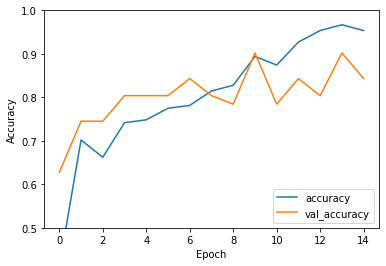

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc= model.evaluate(imgs_test, lbls_test, verbose=2)
print(test_acc)

In [ ]:
predictions=model.predict(imgs_test)

2/2 [==============================] - 0s 37ms/step


Test image number: 42 Predicted class: 1  real class:1


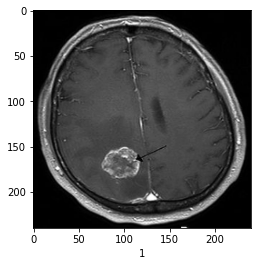

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 20 Predicted class: 1  real class:1


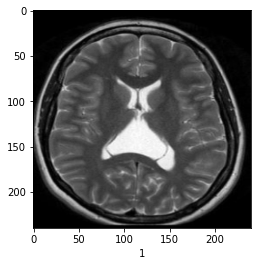

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 36 Predicted class: 1  real class:1


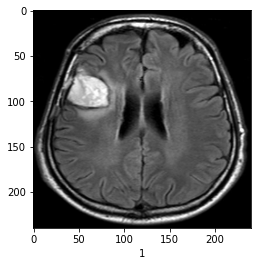

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 4 Predicted class: 1  real class:1


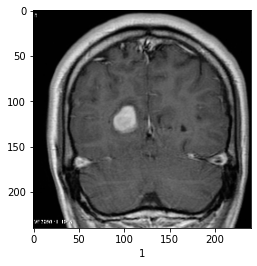

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 40 Predicted class: 0  real class:0


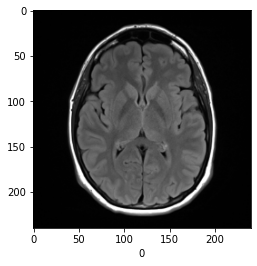

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 6 Predicted class: 1  real class:1


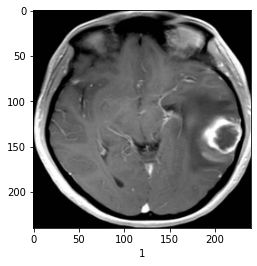

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 18 Predicted class: 1  real class:1


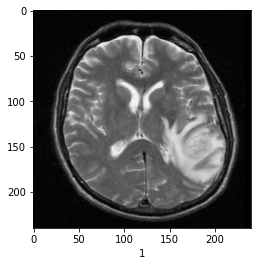

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 23 Predicted class: 1  real class:0


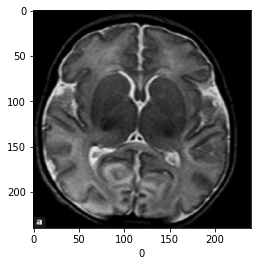

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 38 Predicted class: 0  real class:0


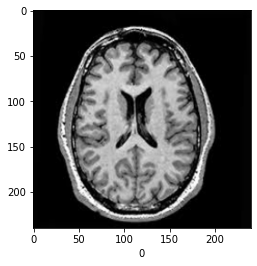

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)

Test image number: 11 Predicted class: 1  real class:0


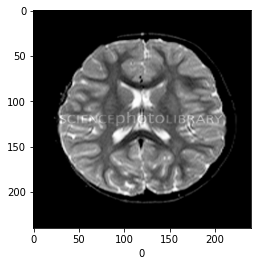

In [ ]:
i=random.randint(0,50)
x=np.round(predictions[i])
y=lbls_test[i]
y=str(y)
plt.imshow(imgs_test[i],cmap='gray')
plt.xlabel(lbls_test[i])
print("Test image number:",int(i),"Predicted class:",int(x)," real class:"+y)